# **1 - Implementation of A/B Testing (in simple way)**

Experimentation and A/B testing

In [1]:
# Package/library untuk manipulasi data
import pandas as pd
import numpy as np

# Package/library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# <font color='blue'>1. PacCommerce Case (New Webdesign) </font>
---

## **1. Import data yang eksperimen PacCommerce**
---

- Data eksperimentasi PacCommerce disimpan dalam file `.csv` bernama `abtest_paccommerce.csv`
- Masukkan data ke dalam Python menggunakan `pd.read_csv(...)` untuk memulai proses analisa

In [2]:
# Masukkan filename
filename = "abtest_paccommerce.csv"

# Import data
data = pd.read_csv(filename)

# Tampilkan 5 data teratas
data.head()

,user_id,timestamp,group,landing_page,converted
0,688937,42:41.4,treatment,new_page,0
1,884319,43:36.9,treatment,new_page,0
2,692455,47:12.6,control,old_page,0
3,801251,47:27.9,control,old_page,1
4,637815,21:48.9,control,old_page,0


- Terlihat data terdiri atas 5 fitur (`user_id`, `timestamp`, `group`, `landing_page`, dan `converted`)
- Berikut adalah deskripsi masing-masing fitur :
 -  `user_id` : unique user identificator
 - `timestamp` : waktu
 - `group` : grup control atau treatment
 - `landing_page` : tipe landing page (new_page atau old_page)
 - converted : jika 1 maka converted, jika 0 tidak converted

In [3]:
# Cari ukuran data
data.shape

(3570, 5)

In [4]:
# Cek duplikat
# Kita cek data user_id yang duplikat
data.duplicated(["user_id"]).sum()

np.int64(0)

In [5]:
# Cek group & landing page yang tidak sesuai
group_name = "treatment"
landing_page_name = "old_page"

# Buat kondisi grup
condition_group = data["group"] == group_name
condition_page = data["landing_page"] == landing_page_name

# Seleksi data dengan kondisi di atas
data_salah_1 = data[condition_group & condition_page]

In [6]:
# tampilkan data salah
data_salah_1.head()

,user_id,timestamp,group,landing_page,converted
42,869707,36:28.2,treatment,old_page,0
248,820951,42:54.8,treatment,old_page,0
643,839954,58:22.3,treatment,old_page,0
814,880442,42:39.0,treatment,old_page,0
1104,686623,26:40.7,treatment,old_page,0


In [7]:
# simpan nomor row biar bisa dihapus
row_data_salah_1 = data_salah_1.index

row_data_salah_1

Index([  42,  248,  643,  814, 1104, 1297, 1460, 1589, 1992, 2093, 2155, 2298,
       2497, 2501, 2885, 2913, 2936, 3363],
      dtype='int64')

In [8]:
# Cek group & landing page yang tidak sesuai
group_name = "control"
landing_page_name = "new_page"

# Buat kondisi grup
condition_group = data["group"] == group_name
condition_page = data["landing_page"] == landing_page_name

# Seleksi data dengan kondisi di atas
data_salah_2 = data[condition_group & condition_page]

In [9]:
# tampilkan data salah
data_salah_2.head()

,user_id,timestamp,group,landing_page,converted
412,872666,44:32.1,control,new_page,0
547,858458,51:33.2,control,new_page,1
628,646342,39:23.5,control,new_page,0
666,639817,39:11.8,control,new_page,0
685,717682,05:39.9,control,new_page,0


In [10]:
# simpan nomor row biar bisa dihapus
row_data_salah_2 = data_salah_2.index

row_data_salah_2

Index([ 412,  547,  628,  666,  685,  783,  853,  951, 1337, 1451, 1515, 1665,
       2235, 2551, 2692, 2851, 2861],
      dtype='int64')

In [11]:
row_data_salah = np.hstack([row_data_salah_1, row_data_salah_2])
row_data_salah

array([  42,  248,  643,  814, 1104, 1297, 1460, 1589, 1992, 2093, 2155,
       2298, 2497, 2501, 2885, 2913, 2936, 3363,  412,  547,  628,  666,
        685,  783,  853,  951, 1337, 1451, 1515, 1665, 2235, 2551, 2692,
       2851, 2861])

In [12]:
# drop data salah
data_clean = data.drop(index = row_data_salah)

data_clean.head()

,user_id,timestamp,group,landing_page,converted
0,688937,42:41.4,treatment,new_page,0
1,884319,43:36.9,treatment,new_page,0
2,692455,47:12.6,control,old_page,0
3,801251,47:27.9,control,old_page,1
4,637815,21:48.9,control,old_page,0


In [13]:
# lihat ukuran baru data
data_clean.shape

(3535, 5)

## **2. Cari banyak user, yang convert, dan conversion rate**
---

- Kita ingin mengisi tabel berikut

<center>

|Group|Banyak User|Count Converted|Conversion Rate|
|:--|:--:|:--:|:--:|
|Control|-|-|-|
|Treatment|-|-|-|

</center>

In [14]:
# Buat data control
data_control = data_clean[data_clean["group"] == "control"]

data_control.head()

,user_id,timestamp,group,landing_page,converted
2,692455,47:12.6,control,old_page,0
3,801251,47:27.9,control,old_page,1
4,637815,21:48.9,control,old_page,0
6,817695,27:16.1,control,old_page,0
8,666992,12:44.9,control,old_page,0


In [15]:
# Buat data treatment
data_treatment = data_clean[data_clean["group"] == "treatment"]

data_treatment.head()

,user_id,timestamp,group,landing_page,converted
0,688937,42:41.4,treatment,new_page,0
1,884319,43:36.9,treatment,new_page,0
5,821916,24:40.2,treatment,new_page,0
7,853373,55:47.6,treatment,new_page,0
9,761154,35:24.3,treatment,new_page,1


In [16]:
# Banyak user di group control
n_control = data_control.shape[0]

n_control

1768

In [17]:
# Banyak user di group treatment
n_treatment = data_treatment.shape[0]

n_treatment

1767

*sekarang kita sudah bisa mengisi tabel di slide*

<center>

|Group|Banyak User|Count Converted|Conversion Rate|
|:--|:--:|:--:|:--:|
|Control|1768|-|-|
|Treatment|1767|-|-|

</center>

In [18]:
# banyak user convert di group control

# cari data group control yang convert
data_control_convert = data_control[data_control["converted"] == 1]

# hitung banyak data yang convert
n_control_convert = data_control_convert.shape[0]

n_control_convert

236

In [19]:
# banyak user convert di group treatment

# cari data group treatment yang convert
data_treatment_convert = data_treatment[data_treatment["converted"] == 1]

# hitung banyak data yang convert
n_treatment_convert = data_treatment_convert.shape[0]

n_treatment_convert

234

In [20]:
# Conversion rate user control
cr_control = n_control_convert / n_control
cr_control

0.1334841628959276

In [21]:
# Conversion rate user treatment
cr_treatment = n_treatment_convert / n_treatment
cr_treatment

0.13242784380305603

<center>

|Group|Banyak User|Count Converted|Conversion Rate|
|:--|:--:|:--:|:--:|
|Control|1768|236|0.133|
|Treatment|1767|234|0.132|

</center>

<ipython-input-22-039e2129d2d4>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)


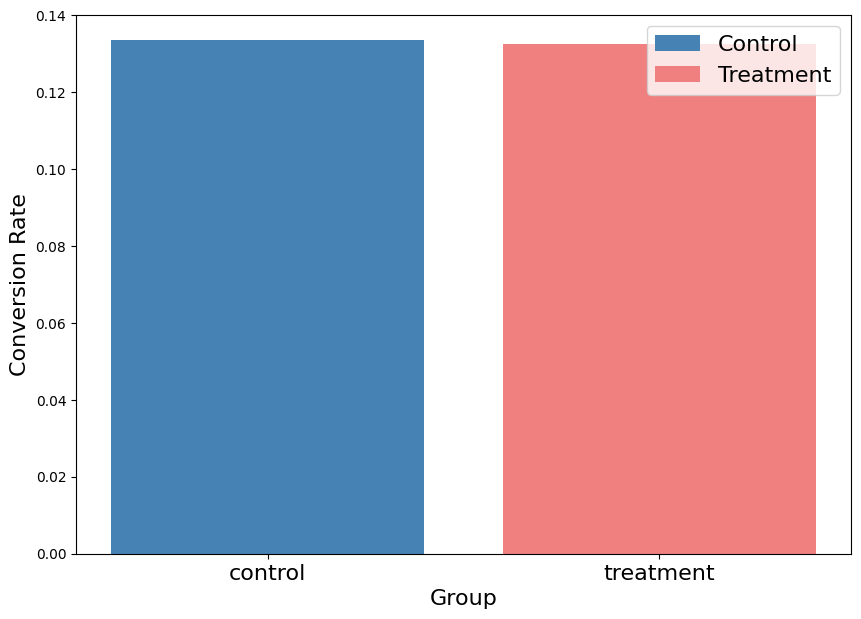

In [22]:
# visualisasi perbandingan conversion rate tiap varian
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Buat plot
ax.bar("control", cr_control, color="steelblue", label="Control")
ax.bar("treatment", cr_treatment, color="lightcoral", label="Treatment")

# Styling plot
ax.set_ylabel("Conversion Rate", fontsize=16)
ax.set_xlabel("Group", fontsize=16)
ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)
ax.legend(fontsize=16)
plt.show()

## **3. Lakukan Uji Statistik**
---

- Kita ingin mengisi tabel berikut

<center>

|Z statistics|P-value|Selisih antar CR
|:--:|:--:|:--:|
|-|-|-|

</center>

In [23]:
# Import library ini untuk melakukan perhitungan
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [24]:
# Buat count convert & total observation
count_convert = [n_treatment_convert,n_control_convert]
count_observation = [n_treatment,n_control]

In [25]:
# Buat alternative
alternative_option = "larger"

In [26]:
# Panggil fungsi
z_stat, p_value = proportions_ztest(count = count_convert,
                                    nobs = count_observation,
                                    alternative = alternative_option)

print(f"Z stats : {z_stat:.4f}")
print(f"P-value : {p_value:.4f}")

Z stats : -0.0925
P-value : 0.5368


In [27]:
cr_treatment - cr_control

-0.0010563190928715716

In [28]:
# tambahan
# Kita bisa hitung relative effect yang menunjukkan seberapa besar persentase peningkatan atau penurunan conversion rate treatment dibandingkan control
relative_effect = (cr_treatment - cr_control)/cr_control * 100

print(f"relatife effect = {relative_effect:.3} %")

relatife effect = -0.791 %


In [29]:
# Dari p-value
alpha = 0.05        # confidence level yang kita set

# Buat decision berdasarkan p_value dan alpha
if p_value < alpha:
    print("Tolak H_0")
else:
    print("Tidak memiliki bukti cukup untuk menolak H_0")

Tidak memiliki bukti cukup untuk menolak H_0


In [30]:
# Z critical adalah z-value saat alpha
import scipy.stats as stats
z_critical = stats.norm.ppf(1 - alpha)

z_critical

np.float64(1.6448536269514722)

In [31]:
# Dari z-statistics
# Buat decision berdasarkan z_critical dan alpha
if z_stat > z_critical:
    print("Tolak H_0")
else:
    print("Tidak memiliki bukti cukup untuk menolak H_0")

Tidak memiliki bukti cukup untuk menolak H_0


In [32]:
# Dapat gunakan library berikut
import scipy.stats as stats

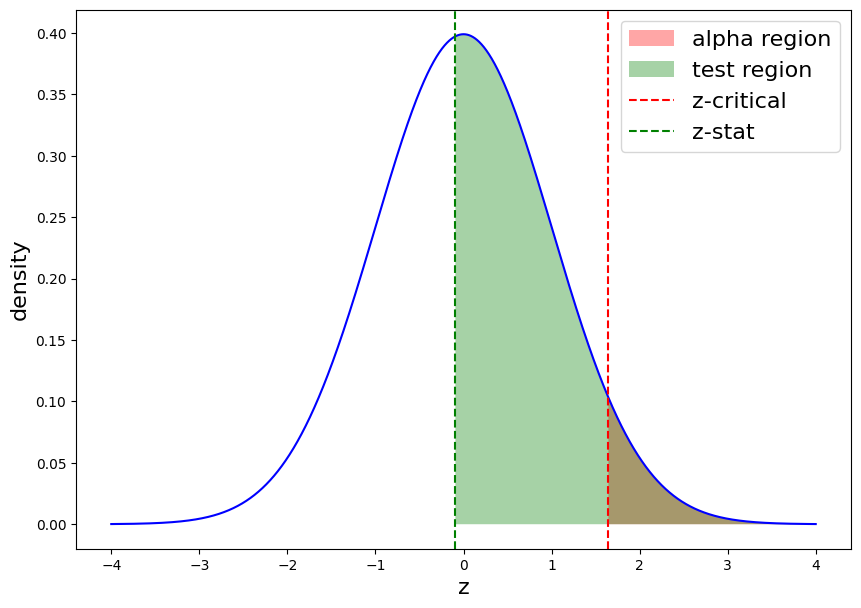

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Plot distribusi sample
x_sample = np.arange(-4., 4., 0.001)
y_sample = stats.norm.pdf(x_sample, 0, 1)
ax.plot(x_sample, y_sample,
        color = "blue")

# Plot region dari alpha (region tempat menolak H-0)
# Region ini berwarna merah
x_alpha = np.arange(z_critical, 4., 0.001)
y_alpha = stats.norm.pdf(x_alpha)
ax.fill_between(x = x_alpha,
                y1 = y_alpha,
                facecolor = "red",
                alpha = .35,
                label = "alpha region")


# Plot region dari sampel yang kita temukan
# Region ini berwarna hijau
x_test = np.arange(z_stat, 4., 0.001)
y_test = stats.norm.pdf(x_test)
ax.fill_between(x = x_test,
                y1 = y_test,
                facecolor = "green",
                alpha = .35,
                label = "test region")


# Plot vertical line alpha
ax.axvline(z_critical,
           color = "red",
           linestyle = "--",
           label = "z-critical")

# Plot vertical line test
ax.axvline(z_stat,
           color = "green",
           linestyle = "--",
           label = "z-stat")


# Styling plot
ax.set_xlabel("z", fontsize=16)
ax.set_ylabel("density", fontsize=16)

plt.legend(fontsize=16)
plt.show()

# <font color='blue'>2. Promotional Email Case</font>
---

## **1. Import data A/B Testing for Promotional Email**
---

- Data eksperimentasi Promotional Email disimpan dalam file `.csv` bernama `promotional_email.csv`
- Masukkan data ke dalam Python menggunakan `pd.read_csv(...)` untuk memulai proses analisa

In [34]:
# Masukkan filename
filename = "promotional_email.csv"

# Import data
data = pd.read_csv(filename)

# Tampilkan 5 data teratas
data.head()

,email,group,promotional_email_subject,click
0,bahirahdewiana8d4@online.ms,treatment,personalization,0
1,abdurrahmanagoengxzq@sharedmailbox.org,treatment,personalization,1
2,zaituniratuj4@ma.nl,control,generic,0
3,arifineffendy8@heerschap.com,treatment,personalization,1
4,bulannafizah1i@informaticos.com,control,generic,0


In [35]:
# Cari ukuran data
data.shape

(1820, 4)

In [36]:
# Cek duplikat
# Kita cek data email yang duplikat
data.duplicated(["email"]).sum()

np.int64(0)

In [37]:
# Cek group & email subject yang tidak sesuai
group_name = "treatment"
email_subject = "generic"

# Buat kondisi grup
condition_group = data["group"] == group_name
condition_page = data["promotional_email_subject"] == email_subject

# Seleksi data dengan kondisi di atas
data_salah_1 = data[condition_group & condition_page]

#tampilkan data yang salah
data_salah_1

,email,group,promotional_email_subject,click


In [38]:
# Cek group & landing page yang tidak sesuai
group_name = "control"
email_subject = "personalization"

# Buat kondisi grup
condition_group = data["group"] == group_name
condition_page = data["promotional_email_subject"] == email_subject

# Seleksi data dengan kondisi di atas
data_salah_2 = data[condition_group & condition_page]

#tampilkan data yang salah
data_salah_2

,email,group,promotional_email_subject,click


## **2. Cari banyak user, yang click, dan CTR**
---

In [39]:
# Buat data control
data_control = data[data["group"] == "control"]

data_control.head()

,email,group,promotional_email_subject,click
2,zaituniratuj4@ma.nl,control,generic,0
4,bulannafizah1i@informaticos.com,control,generic,0
7,chaerunisa@motormania.com,control,generic,0
8,bungam@teenagedirtbag.com,control,generic,0
9,lianggemiujf@clrmail.com,control,generic,0


In [40]:
# Buat data treatment
data_treatment = data[data["group"] == "treatment"]

data_treatment.head()

,email,group,promotional_email_subject,click
0,bahirahdewiana8d4@online.ms,treatment,personalization,0
1,abdurrahmanagoengxzq@sharedmailbox.org,treatment,personalization,1
3,arifineffendy8@heerschap.com,treatment,personalization,1
5,latip3@fakemailz.com,treatment,personalization,0
6,shafiyahwp@thirdage.com,treatment,personalization,0


In [41]:
# Banyak user di group control
n_control = data_control.shape[0]

n_control

910

In [42]:
# Banyak user di group treatment
n_treatment = data_treatment.shape[0]

n_treatment

910

In [43]:
# banyak user click di group control

# cari data group control yang click
data_control_click = data_control[data_control["click"] == 1]

# hitung banyak data yang click
n_control_click = data_control_click.shape[0]

n_control_click

182

In [44]:
# banyak user click di group treatment

# cari data group treatment yang click
data_treatment_click = data_treatment[data_treatment["click"] == 1]

# hitung banyak data yang click
n_treatment_click = data_treatment_click.shape[0]

n_treatment_click

227

<center>

|Group|Banyak User|Count Clicked|CTR|
|:--|:--:|:--:|:--:|
|Control|910|182|-|
|Treatment|910|227|-|

</center>

In [45]:
# Click through rate user control
ctr_control = n_control_click / n_control
ctr_control

0.2

In [46]:
# Click through rate user treatment
ctr_treatment = n_treatment_click / n_treatment
ctr_treatment

0.24945054945054945

<center>

|Group|Banyak User|Count Clicked|CTR|
|:--|:--:|:--:|:--:|
|Control|910|182|0.2|
|Treatment|910|227|0.2495|

</center>

<ipython-input-47-0333d3484961>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)


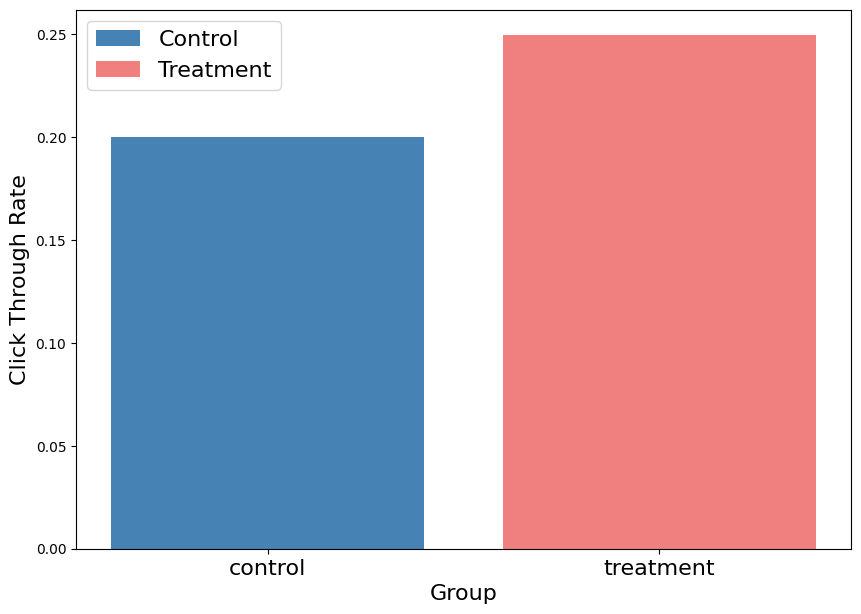

In [47]:
# visualisasi perbandingan click rate tiap varian
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Buat plot
ax.bar("control", ctr_control, color="steelblue", label="Control")
ax.bar("treatment", ctr_treatment, color="lightcoral", label="Treatment")

# Styling plot
ax.set_ylabel("Click Through Rate", fontsize=16)
ax.set_xlabel("Group", fontsize=16)
ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)
ax.legend(fontsize=16)
plt.show()

## **3. Lakukan Uji Statistik**
---

- Kita ingin mengisi tabel berikut

<center>

|Z statistics|P-value|Selisih antar CTR
|:--:|:--:|:--:|
|-|-|-|

</center>

In [48]:
# Import library ini untuk melakukan perhitungan
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [49]:
# Buat count convert & total observation
count_convert = [n_treatment_click, n_control_click]
count_observation = [n_treatment, n_control]

In [50]:
# Buat alternative
alternative_option = "larger"

In [51]:
# Panggil fungsi
test_stat, p_value = proportions_ztest(count = count_convert,
                                       nobs = count_observation,
                                       alternative = alternative_option)

print(f"Z stats : {test_stat:.4f}")
print(f"P-value : {p_value:.4f}")

Z stats : 2.5271
P-value : 0.0058


In [52]:
ctr_treatment - ctr_control

0.04945054945054944

In [53]:
# tambahan
# Kita bisa hitung relative effect yang menunjukkan seberapa besar persentase peningkatan atau penurunan CTR treatment dibandingkan control
relative_effect_CTR = (ctr_treatment - ctr_control)/ctr_control * 100

print(f"relatife effect = {relative_effect_CTR:.3} %")

relatife effect = 24.7 %


In [54]:
# Dari p-value
alpha = 0.05        # confidence level yang kita set

# Buat decision berdasarkan p_value dan alpha
if p_value < alpha:
    print("Tolak H_0")
else:
    print("Tidak memiliki bukti cukup untuk menolak H_0")

Tolak H_0


In [55]:
# Dari z-statistics

# Z critical adalah z-value saat alpha
z_critical = stats.norm.ppf(1 - alpha)

# Buat decision berdasarkan z_critical dan alpha
if test_stat > z_critical:
    print("Tolak H_0")
else:
    print("Tidak memiliki bukti cukup untuk menolak H_0")

Tolak H_0


In [56]:
# Dapat gunakan library berikut
import scipy.stats as stats

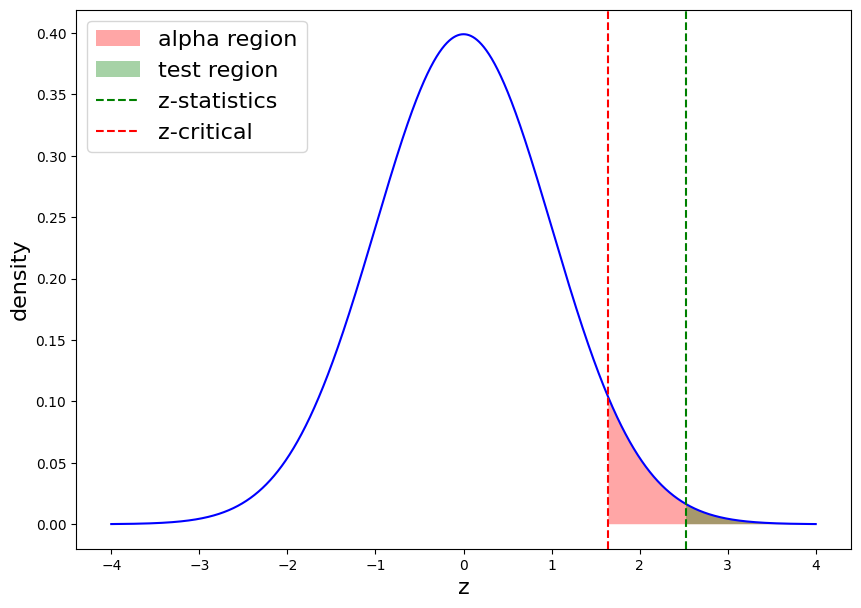

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot distribusi sample
x = np.arange(-4., 4., 0.001)
y = stats.norm.pdf(x, 0, 1)
ax.plot(x, y,
        color='blue')

# Plot region dari alpha (region tempat menolak H-0)
# Region ini berwarna merah
x_alpha = np.arange(z_critical, 4, 0.001)
y_alpha = stats.norm.pdf(x_alpha)
ax.fill_between(x = x_alpha,
                y1 = y_alpha,
                facecolor = 'red',
                alpha = 0.35,
                label = 'alpha region')

# Plot region dari sampel yang kita temukan
# Region ini berwarna hijau
x_test = np.arange(test_stat, 4., 0.01)
y_test = stats.norm.pdf(x_test)
ax.fill_between(x = x_test,
                y1 = y_test,
                facecolor = 'green',
                alpha = 0.35,
                label = 'test region')

# Plot vertical line test
ax.axvline(np.round(test_stat, 4),
           color ="green",
           linestyle = "--",
           label ="z-statistics")
# Plot vertical line alpha
ax.axvline(z_critical,
           color ="red",
           linestyle = "--",
           label ="z-critical")

# Styling plot
ax.set_xlabel("z", fontsize=16)
ax.set_ylabel("density", fontsize=16)

plt.legend(fontsize=16)
plt.show()

- Luas daerah diarsir adalah **probability menemukan $H_{0}$ dari sampel**
- Terlihat luas daerah hijau < luas daerah merah (daerah tempat menolak $H_{0}$)
- Artinya, peluang mendapatkan $H_{0}$ dari sampel lebih kecil lagi dibandingkan batas $\alpha$ yang kita set.
- Maka secara statistik, kita tidak punya cukup bukti untuk menerima $H_{0}$ (p-value kecil kurang dari $\alpha$), sehingga $H_{0}$ ditolak

**4. Kesimpulan dan Keputusan**

- p-value (0.0058) < 𝛼 (0.05) → Tolak H0
- z statistics (2.5271) > z tabel (1.645) → Tolak H0


CTR promotional email baru (personalization) lebih dari CTR promotional email lama (generic)

dengan kata lain

Promotional email baru bisa meningkatkan click through rate (CTR).

Sumber data : Pacmann